In [2]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.cluster import KMeans

In [3]:
#Get the desricptive statistics:

class DescriptiveStatistics:
    '''This class takes the column-names as an input and will return the descriptive statistics. 
    It is made for the Screw and Non-Screw data per default. If you have other marterials, you 
    can set them as instance-variables.'''

    def __init__(self, column_1, column_2, name_one="Screws",name_two="No Screws"):
        self.one = column_1
        self.two = column_2
        self.n_one = name_one
        self.n_two = name_two
    
    def show_mean(self):
        #This function calculates and prints the mean of both columns:
        mean_one = self.one.mean()
        mean_two = self.two.mean()

        print(f"\nThe mean of the {self.one.name} column for the {self.n_one} values is {mean_one}.")
        print(f"The mean of the {self.two.name} column for the {self.n_two} values is {mean_two}.")
    
    def show_std(self):
        #This function calculates and prints the standarddeviations of both columns:
        std_one = self.one.std()
        std_two = self.two.std()

        print(f"\nThe standarddeviation of the {self.one.name} column for the {self.n_one} values is {std_one}.")
        print(f"The standarddeviation of the {self.two.name} column for the {self.n_two} values is {std_two}.")
    
    def show_median(self):
        #This function calculates and prints the median of both columns:
        median_one = self.one.median()
        median_two = self.two.median()

        print(f"\nThe median of the {self.one.name} column for the {self.n_one} values is {median_one}.")
        print(f"The median of the {self.two.name} column for the {self.n_two} values is {median_two}.")

    def show_quartiles(self):
        #This function calculates and prints the quartiles of the two columns:
        quartiles_one = self.one.quantile([0.25, 0.5, 0.75])
        quartiles_two = self.two.quantile([0.25, 0.5, 0.75])

        print(f"\nThe quartiles of the {self.one.name} column for the {self.n_one} values is \n{quartiles_one}.")
        print(f"The quarilet of the {self.two.name} column for the {self.n_two} values is \n{quartiles_two}.")
    
    def show_range(self):
        #This function calculates and prints the ranges of the two columns:
        range_one = self.one.agg(['min', 'max'])
        range_two = self.two.agg(['min', 'max'])

        print(f"\nThe range of the {self.one.name} column for {self.n_one}:")
        print(range_one)
        print(f"The range of the {self.two.name} column for {self.n_two}:")
        print(range_two)
    
    def print_all(self):
        #This function prints range, median, mean standarddeviation and quartiles of the input columns:
        self.show_range()
        self.show_median()
        self.show_mean()
        self.show_std()
        self.show_quartiles()

    def show_variation_ratio(self):
        #This function calculates and prints the variation-ratio
        vr_one = (self.one.std()/self.one.mean())*100
        vr_two = (self.two.std()/self.two.mean())*100

        print(f"Variation-ratio of the {self.one.name} column for the {self.n_one}: {vr_one}")
        print(f"Variation-ratio no {self.two.name} column for the {self.n_two}: {vr_two}")

In [4]:
# Load physical marterials info

filepath = 'C:/Users/nbabic/Desktop/OMM/Data/3-solutioning/pandas_df2.csv'

df = pd.read_csv(filepath)

C:\Users\nbabic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (9,14,16,17,19,20,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.head()


,Unnamed: 0,Name,Product_ID,Product_UserTypeID,AT_MaraBshmCax3D,AT_MaraNtgew,AT_MaraVolum,AT_SAPID,AT_MaraMatkl,AT_MaraNumtp,...,AT_MaraLabor,AT_MaraExtwg,AT_MaraBismt,AT_MaraMeins,AT_MaraMtart,AT_MaraGroes,AT_LeadingSystem,AT_MaraNtgew_UnitID,AT_MaraVolum_UnitID,AT_MaraBrgew_UnitID
0,1,9001422279 - Lens Head Screw M4x8,MAT_928319,Material,60100004395930,1.300,0.0,9001422279,H002 - Customized screws,NaN,...,"H10 - FCGB Inserra, Bortolo",NaN,5750172759,piece(s),Materials which are externally procured,NaN,SAP,unece.unit.GRM,unece.unit.DMQ,unece.unit.GRM
1,2,9001730689 - CP body laser printed WT45HV14FR,MAT_928320,Material,NaN,0.318,0.0,9001730689,R239 - xxx - do not use anymore,prefabricated parts,...,WD0 - FLCD Default (FDW),NaN,9001452855,piece(s),Materials which can be potentially produced in...,NaN,SAP,unece.unit.KGM,unece.unit.CMQ,unece.unit.KGM
2,3,"9001730699 - USER MA. SE (WT45HV14FR), FR",MAT_928323,Material,NaN,0.020,0.0,9001730699,X810 - Printed material (general),NaN,...,WD0 - FLCD Default (FDW),NaN,9001452871,piece(s),Materials which can be potentially produced in...,NaN,SAP,unece.unit.KGM,unece.unit.CMQ,unece.unit.KGM
3,4,9001731054 - fascia panel GV650A.UC Int White...,MAT_928324,Material,60100007114130,0.000,0.0,9001731054,R250 - Injected parts (general),NaN,...,"G8A - FDG Neukirchner,Daniel",NaN,8001186041,piece(s),Materials which can be potentially produced in...,NaN,SAP,unece.unit.GRM,unece.unit.CMQ,unece.unit.GRM
4,5,9001762412 - Cable Harness operat. EE 590 SP....,MAT_928325,Material,60100008886908,26.800,0.0,9001762412,L592 - IDC+IDC jumpers,NaN,...,"VBI - FCGB Schuhmacher, Jochen",NaN,NaN,piece(s),Materials which are externally procured,L 590MM,SAP,unece.unit.GRM,unece.unit.DMQ,unece.unit.GRM


In [6]:
# Check if the first three letters of the Product-ID are a predictor for a special category:

#Seperate the first three letters of the IP
#df['Product_ID'] = df['Product_ID'].str.replace('_\d+', '')

#Check how much different Product_ID's exist
# distinct_IDs = df['Product_ID'].value_counts()

# print(distinct_IDs)

As you can see, the Product_ID of all marterials are unique. So I want to check, if same marterials are in the same cluster. To get this information, I try to extract the screws(like a colleague did it before) and check, if theyr Product_ID's are in a cluster.

In [7]:
#Delete the MAT of each row:
df['Product_ID'] = df['Product_ID'].str.replace('^[^_]+_', '')

C:\Users\nbabic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [8]:
#For this, I search for screws like previos colleagues did and than I check the range of the value-numbers:

#Create on dataframe of screws and one without screws:
df_screws = df[df['Name'].str.contains('screw|tornillo|schraube', case=False)] 
df_no_screws = df[df['Name'].str.contains('screw|tornillo|schraube') == False] 

In [9]:
#For making a k means-cluster, I add the column 'k'. In case of screw, 
#the value should be one in any other case it should be 0 
def add_k_column(dataframe):
    # Create a boolean mask based on the condition
    mask = df['Name'].str.contains('screw|tornillo|schraube', case=False)
    
    # Create a new column 'k' and set its values based on the mask
    df['k'] = 0
    df.loc[mask, 'k'] = 1
    
    # Return the modified DataFrame
    return df

k_table = add_k_column(df)

In [10]:
#Extract only the Product-ID:
df_pid_screw = df_screws["Product_ID"]
df_pid_noscrews = df_no_screws["Product_ID"]

In [11]:
#Makes the values to integers:
df_pid_screw = pd.to_numeric(df_pid_screw, errors='coerce')
df_pid_noscrews = pd.to_numeric(df_pid_noscrews, errors='coerce')

In [12]:
#Get the descriptive statstics:
DescriptiveStatistics(df_pid_screw,df_pid_noscrews).print_all()


The range of the Product_ID column for Screws:
min      906770
max    10893541
Name: Product_ID, dtype: int64
The range of the Product_ID column for No Screws:
min      900289
max    10898548
Name: Product_ID, dtype: int64

The median of the Product_ID column for the Screws values is 8952099.0.
The median of the Product_ID column for the No Screws values is 9424768.0.

The mean of the Product_ID column for the Screws values is 6709861.658879471.
The mean of the Product_ID column for the No Screws values is 8130125.210537157.

The standarddeviation of the Product_ID column for the Screws values is 3807866.4638841315.
The standarddeviation of the Product_ID column for the No Screws values is 3090961.070374669.

The quartiles of the Product_ID column for the Screws values is 
0.25    2198560.0
0.50    8952099.0
0.75    9712702.0
Name: Product_ID, dtype: float64.
The quarilet of the Product_ID column for the No Screws values is 
0.25     8173111.5
0.50     9424768.0
0.75    10097946.5
Nam

As cou can see, the Product-IDs of the Screws are almost in the same range, like them of the non-screws.
I do not see an indicator, that the Product-ID could have predictive power for a product category.

In [13]:
# Check if the ProductUserType_ID is a predictor for a special category:

#Check how much different ProductUserType_ID's exist
distinct_PIDs = len(df['Product_UserTypeID'].unique())

print(distinct_PIDs)


1


As you can see, the ProductUserType_ID is no predictor fot the products category. Because all rows have the same value

## Check if the AT_MaraBshmCax3Dis a predictor for a special category:

In [14]:
#Check how much different values exist for column:
distinct_rows = len(df['AT_MaraBshmCax3D'].unique())

print(distinct_rows)

134002


In [15]:
#Filter the given column:
mara_column_screws = df_screws['AT_MaraBshmCax3D']
distinct_cs = mara_column_screws
mara_column_no_screws = df_no_screws["AT_MaraBshmCax3D"]
distinct_cns = mara_column_no_screws

#Get number of distict values:
print(f"Screws: {len(distinct_cs)}")
print(f"No Screws: {len(distinct_cns)}")

#Get the rows with NaN-values:
nan_screws = distinct_cs.isna()
nan_no_screws = distinct_cns.isna()

#Check how much are NaN-values:
print(f"Non-Vales in Screws Df: {nan_screws.sum()}")
print(f"Non-Vales in Screws Df: {nan_no_screws.sum()}")

#Check out the ratio of Values to NaN-value:
ratio_screws = float(nan_screws.sum()) / float(len(distinct_cs))
ratio_non_screws = float(nan_no_screws.sum()) / float(len(distinct_cns))

print(f"Ratio of All-Values to NaN-values for the Screws-Dataframe: {ratio_screws}")

print(f"Ratio of All-Values to NaN-values for the No-Screws-Dataframe: {ratio_non_screws}")


Screws: 4837
No Screws: 1218526
Non-Vales in Screws Df: 2425
Non-Vales in Screws Df: 914541
Ratio of All-Values to NaN-values for the Screws-Dataframe: 0.5013438081455448
Ratio of All-Values to NaN-values for the No-Screws-Dataframe: 0.7505305590524946


For the dataframe of screws, more than half of the rows in this column are NaN values, and for the dataframe of other products, this applies to 75%. Thus, this column seems to have no meaningful information.

###Check the "AT_MaraNtgew" Column!###

#For this I will use the Screws-df and the Non-Screws-df again and compare the values in the columns.

In [16]:
#Set the variables:
df_ntg_s = df_screws["AT_MaraNtgew"]
df_ntg_ns = df_no_screws["AT_MaraNtgew"]

In [17]:
#Get the range:
descriptive_ntg = DescriptiveStatistics(df_ntg_s,df_ntg_ns)
descriptive_ntg.show_range()


The range of the AT_MaraNtgew column for Screws:
min       0.0
max    2500.0
Name: AT_MaraNtgew, dtype: float64
The range of the AT_MaraNtgew column for No Screws:
min    0.000000e+00
max    1.234568e+09
Name: AT_MaraNtgew, dtype: float64


As you can see, in this column, the range of the Screws is way different to the range of the rest. In the next step, we will check the Quartiles and some other basic statistics, to get an overview, if this column could predict, if the marterial is a screw or not

In [18]:
descriptive_ntg.show_quartiles()
descriptive_ntg.show_mean()
descriptive_ntg.show_std()
descriptive_ntg.show_median()



The quartiles of the AT_MaraNtgew column for the Screws values is 
0.25    0.0
0.50    0.0
0.75    0.1
Name: AT_MaraNtgew, dtype: float64.
The quarilet of the AT_MaraNtgew column for the No Screws values is 
0.25    0.0
0.50    0.0
0.75    0.1
Name: AT_MaraNtgew, dtype: float64.

The mean of the AT_MaraNtgew column for the Screws values is 4.8118428778168285.
The mean of the AT_MaraNtgew column for the No Screws values is 2151.586901107569.

The standarddeviation of the AT_MaraNtgew column for the Screws values is 67.04610427997511.
The standarddeviation of the AT_MaraNtgew column for the No Screws values is 1581696.1827548835.

The median of the AT_MaraNtgew column for the Screws values is 0.0.
The median of the AT_MaraNtgew column for the No Screws values is 0.0.


In [19]:
#Calculate the Variation-ratio:
descriptive_ntg.show_variation_ratio()

Variation-ratio of the AT_MaraNtgew column for the Screws: 1393.356058841108
Variation-ratio no AT_MaraNtgew column for the No Screws: 73513.00484031932


As you can see, the variation ratio of this columns is huge (bigger than 100). This column has a huge variation with a lot of statistival outliers.

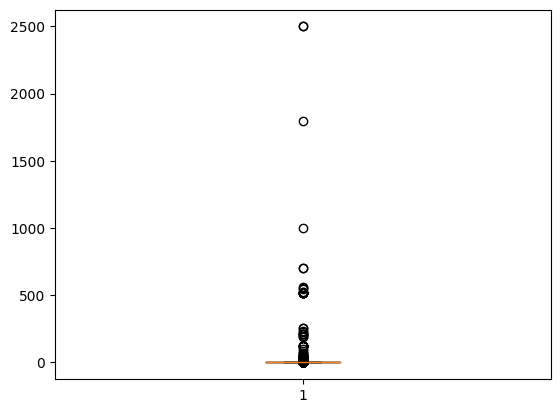

In [20]:
#Create a boxplot of the Screw datafram
plt.boxplot(df_ntg_s)

#Show graph:
plt.show()

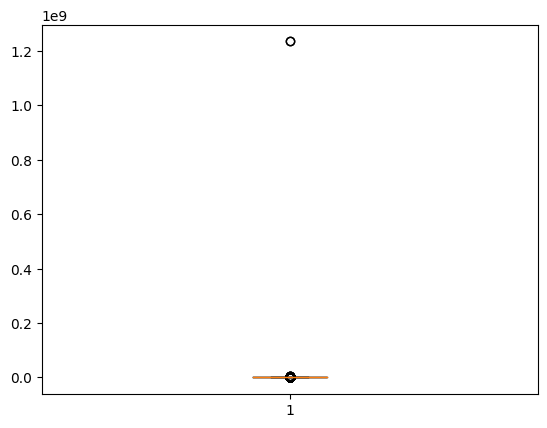

In [21]:
#Create a boxplot of the no-Screw datafram
plt.boxplot(df_ntg_ns)

#Show graph:
plt.show()

As you can see, there are no rows with the same values. But there are some heavy outliers.

In [ ]:
#Anyways I will try making a K-Cluster Mean, to check, if there are any clusters:


In [22]:
df.head()

,Unnamed: 0,Name,Product_ID,Product_UserTypeID,AT_MaraBshmCax3D,AT_MaraNtgew,AT_MaraVolum,AT_SAPID,AT_MaraMatkl,AT_MaraNumtp,...,AT_MaraExtwg,AT_MaraBismt,AT_MaraMeins,AT_MaraMtart,AT_MaraGroes,AT_LeadingSystem,AT_MaraNtgew_UnitID,AT_MaraVolum_UnitID,AT_MaraBrgew_UnitID,k
0,1,9001422279 - Lens Head Screw M4x8,928319,Material,60100004395930,1.300,0.0,9001422279,H002 - Customized screws,NaN,...,NaN,5750172759,piece(s),Materials which are externally procured,NaN,SAP,unece.unit.GRM,unece.unit.DMQ,unece.unit.GRM,1
1,2,9001730689 - CP body laser printed WT45HV14FR,928320,Material,NaN,0.318,0.0,9001730689,R239 - xxx - do not use anymore,prefabricated parts,...,NaN,9001452855,piece(s),Materials which can be potentially produced in...,NaN,SAP,unece.unit.KGM,unece.unit.CMQ,unece.unit.KGM,0
2,3,"9001730699 - USER MA. SE (WT45HV14FR), FR",928323,Material,NaN,0.020,0.0,9001730699,X810 - Printed material (general),NaN,...,NaN,9001452871,piece(s),Materials which can be potentially produced in...,NaN,SAP,unece.unit.KGM,unece.unit.CMQ,unece.unit.KGM,0
3,4,9001731054 - fascia panel GV650A.UC Int White...,928324,Material,60100007114130,0.000,0.0,9001731054,R250 - Injected parts (general),NaN,...,NaN,8001186041,piece(s),Materials which can be potentially produced in...,NaN,SAP,unece.unit.GRM,unece.unit.CMQ,unece.unit.GRM,0
4,5,9001762412 - Cable Harness operat. EE 590 SP....,928325,Material,60100008886908,26.800,0.0,9001762412,L592 - IDC+IDC jumpers,NaN,...,NaN,NaN,piece(s),Materials which are externally procured,L 590MM,SAP,unece.unit.GRM,unece.unit.DMQ,unece.unit.GRM,0


As you can see, there is a Column, calles "AT_MaraNtgew_UnitID". It seems like this shows the unit of measure for the "AT_MaraNtgew"-column. It seems like the "AT_MaraNtgew"-columns gets measured in Gramm or in Kilogramm. I want to check this and than in the next step, check out, how the variation changes, when I clean the data for this value*

In [23]:
#Set the variable
df_weight_unit = df["AT_MaraNtgew_UnitID"]


In [24]:
#Show unique values and their frequence:
print(df_weight_unit.value_counts())

unece.unit.KGM    647662
unece.unit.GRM    572127
unece.unit.LBR        57
unece.unit.MGM        37
unece.unit.TNE        23
Name: AT_MaraNtgew_UnitID, dtype: int64


As you can see, there are five different units. Three of them are used very rarely, two are usend very often.
In the next Step I want to check, if the rarely ones appear in the screw-section of the df

In [25]:
#Check, if the rarely once appear in the screw-dataframe:
df_units_screws = df_screws["AT_MaraNtgew_UnitID"]
print(df_units_screws.value_counts())

unece.unit.KGM    2726
unece.unit.GRM    2111
Name: AT_MaraNtgew_UnitID, dtype: int64


In [26]:
#Multiply the weight-column with 1000, when the weight-unit is uence.unit.GRM
df.loc[df['AT_MaraNtgew_UnitID'] == 'unece.unit.KGM', 'AT_MaraNtgew']*= 1000

In [27]:
#Now I create the df's again:
#Create on dataframe of screws and one without screws:
df_screws = df[df['Name'].str.contains('screw|tornillo|schraube', case=False)] 
df_no_screws = df[df['Name'].str.contains('screw|tornillo|schraube') == False] 


In [28]:
#Set the variables:
df_ntg_s = df_screws["AT_MaraNtgew"]
df_ntg_ns = df_no_screws["AT_MaraNtgew"]

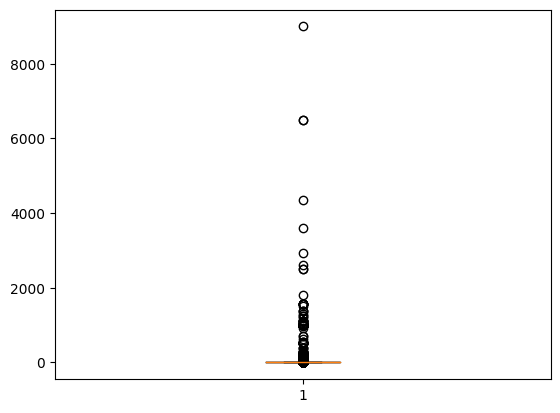

In [29]:
#Create a boxplot
plt.boxplot(df_ntg_s)

#Show graph:
plt.show()

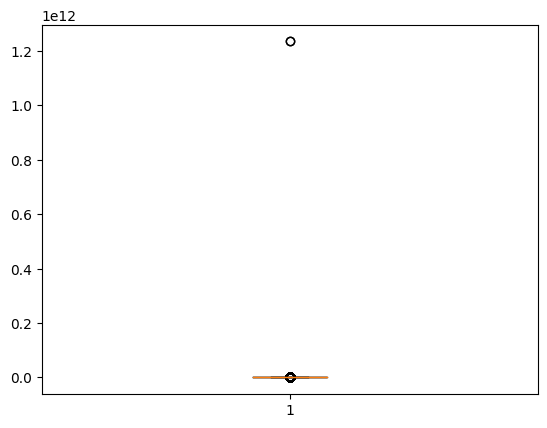

In [30]:
#Create a boxplot for the non screws
plt.boxplot(df_ntg_ns)
!!!!!!!!!
#Show graph:
plt.show()

In [31]:
#Calculate the quartiles:
quartiles_screw = df_ntg_s.quantile([0.25, 0.5, 0.75])
quartiles_no_screw = df_ntg_ns.quantile([0.25, 0.5, 0.75])

#Calculate the standard deviation
std_screw = df_ntg_s.std()
std_no_screw = df_ntg_ns.std()

#Calculate the mean
mean_screw = df_ntg_s.mean()
mean_no_screw = df_ntg_ns.mean()

#Calculate the median
median_screw = df_ntg_s.median()
median_no_screw = df_ntg_ns.median()



print(f"Quartiles Screw: \n{quartiles_screw}")
print(f"Quariles No-Screw: \n{quartiles_no_screw}")


print(f"\nMean Screw: {mean_screw}")
print(f"Mean No Screw: {mean_no_screw}")
print(f"Standarddeviation Screw: {std_screw}")
print(f"Standarddeviation No Screw: {std_no_screw}")


print(f"\nMedian Screw: {median_screw}")
print(f"Median No Screw: {mean_no_screw}")

Quartiles Screw: 
0.25    0.0
0.50    0.0
0.75    2.0
Name: AT_MaraNtgew, dtype: float64
Quariles No-Screw: 
0.25     0.0
0.50     0.0
0.75    25.0
Name: AT_MaraNtgew, dtype: float64

Mean Screw: 50.84267314451106
Mean No Screw: 2028631.8203777631
Standarddeviation Screw: 288.1102127132371
Standarddeviation No Screw: 1581657380.8503172

Median Screw: 0.0
Median No Screw: 2028631.8203777631


As you can see, even, when we cleaned the data, the variation-ratio is still very high. So the Ntgew. column does not predict the marterial classification.

Now I will check, if the column AT_MaraVolum has can predict the classification

In [32]:
df.head()

,Unnamed: 0,Name,Product_ID,Product_UserTypeID,AT_MaraBshmCax3D,AT_MaraNtgew,AT_MaraVolum,AT_SAPID,AT_MaraMatkl,AT_MaraNumtp,...,AT_MaraExtwg,AT_MaraBismt,AT_MaraMeins,AT_MaraMtart,AT_MaraGroes,AT_LeadingSystem,AT_MaraNtgew_UnitID,AT_MaraVolum_UnitID,AT_MaraBrgew_UnitID,k
0,1,9001422279 - Lens Head Screw M4x8,928319,Material,60100004395930,1.3,0.0,9001422279,H002 - Customized screws,NaN,...,NaN,5750172759,piece(s),Materials which are externally procured,NaN,SAP,unece.unit.GRM,unece.unit.DMQ,unece.unit.GRM,1
1,2,9001730689 - CP body laser printed WT45HV14FR,928320,Material,NaN,318.0,0.0,9001730689,R239 - xxx - do not use anymore,prefabricated parts,...,NaN,9001452855,piece(s),Materials which can be potentially produced in...,NaN,SAP,unece.unit.KGM,unece.unit.CMQ,unece.unit.KGM,0
2,3,"9001730699 - USER MA. SE (WT45HV14FR), FR",928323,Material,NaN,20.0,0.0,9001730699,X810 - Printed material (general),NaN,...,NaN,9001452871,piece(s),Materials which can be potentially produced in...,NaN,SAP,unece.unit.KGM,unece.unit.CMQ,unece.unit.KGM,0
3,4,9001731054 - fascia panel GV650A.UC Int White...,928324,Material,60100007114130,0.0,0.0,9001731054,R250 - Injected parts (general),NaN,...,NaN,8001186041,piece(s),Materials which can be potentially produced in...,NaN,SAP,unece.unit.GRM,unece.unit.CMQ,unece.unit.GRM,0
4,5,9001762412 - Cable Harness operat. EE 590 SP....,928325,Material,60100008886908,26.8,0.0,9001762412,L592 - IDC+IDC jumpers,NaN,...,NaN,NaN,piece(s),Materials which are externally procured,L 590MM,SAP,unece.unit.GRM,unece.unit.DMQ,unece.unit.GRM,0


In [33]:
df_mvolum = df["AT_MaraVolum"]

In [34]:
#Show unique values and there frequence:
print(df_mvolum.value_counts())

0.000         1214978
1010.352          871
1216.512          268
1002.351          240
1.000             193
               ...   
156500.000          1
24.800              1
9.400               1
31.000              1
25.000              1
Name: AT_MaraVolum, Length: 892, dtype: int64
